<a href="https://colab.research.google.com/github/heber-augusto/udacity-azure-ml-foudations/blob/master/lab1_linear_regression_model_nyc_taxi_and_limousine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This jupyter notebook was created to compare the effort of doing machine learing tasks without Azure Machine Learning Studio's tools.

The goal at this notebook is to train a linear regression model from one of Azure Open Dataset: NYC Taxi & Limousine Commission - green taxi trip records

A detailed description for this dataset can be found at the link below. 

https://azure.microsoft.com/en-us/services/open-datasets/catalog/nyc-taxi-limousine-commission-green-taxi-trip-records/

The dataset used can be found at:  https://introtomlsampledata.blob.core.windows.net/data/nyc-taxi/nyc-taxi-sample-data.csv

This notebook demonstrate:

1. Getting the dataset and creating dataframe from csv file;
1. Presents some dataset explorations to undestand data;
1. Splitting the dataframe for training;
1. Training a linear regression model.

The output feature from this dataset is the TotalAmount


**The cell bellow contains some libraries and some essencial defines for the tasks**

*   pandas: create a dataframe from csv file;
*   sklearn: split the dataframe between test and train, linear regression trainning and evaluation;
* matplotlib: plot some results.



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


url="https://introtomlsampledata.blob.core.windows.net/data/nyc-taxi/nyc-taxi-sample-data.csv"



**Step 1: Getting the dataset and creating dataframe from csv file**

The dataset can be obtained from the url https://introtomlsampledata.blob.core.windows.net/data/nyc-taxi/nyc-taxi-sample-data.csv

The pandas library has a method which does this: read_csv()

So we will use it and pass the url 

In [3]:
nyc_taxi_dataframe = pd.read_csv(url)


**Presents some dataset explorations to undestand data**

The following 2 cells presents:
 
*  Some basic statics information (using dataframe describe method)
*  Correlation information between TotalAmount column and all the others (corr method)

A lot of others analysis can be done but I will list just this two methods outputs.



In [4]:
nyc_taxi_dataframe.describe()

,vendorID,passengerCount,tripDistance,hour_of_day,day_of_week,day_of_month,month_num,snowDepth,precipTime,precipDepth,temperature,totalAmount
count,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000
mean,1.790608,1.348560,2.866139,13.633884,3.223879,15.000256,3.502898,1.609015,12.028379,190.782342,10.314244,14.733528
std,0.406892,1.016123,2.905810,6.670530,1.961855,8.467892,1.707729,7.146771,10.158597,1211.087724,8.500600,10.983099
min,1.000000,1.000000,0.010000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-13.379464,3.300000
25%,2.000000,1.000000,1.060000,9.000000,2.000000,8.000000,2.000000,0.000000,1.000000,0.000000,3.566372,8.150000
50%,2.000000,1.000000,1.900000,15.000000,3.000000,15.000000,4.000000,0.000000,6.000000,3.000000,10.318229,11.300000
75%,2.000000,1.000000,3.620000,19.000000,5.000000,22.000000,5.000000,0.000000,24.000000,41.000000,17.239744,17.800000
max,2.000000,6.000000,62.550000,23.000000,6.000000,30.000000,6.000000,67.090909,24.000000,9999.000000,26.524107,339.380000


In [12]:
nyc_taxi_dataframe.corr()['totalAmount'].sort_values(ascending=False)

totalAmount       1.000000
tripDistance      0.913318
temperature       0.024572
passengerCount    0.012265
month_num         0.012183
day_of_month      0.011489
snowDepth         0.011220
day_of_week       0.006714
precipTime        0.003953
isPaidTimeOff    -0.001369
vendorID         -0.005318
precipDepth      -0.009635
hour_of_day      -0.028296
Name: totalAmount, dtype: float64

**Splitting the dataframe for training**

For the splitting task we will use train_test_split scikit-learn method
The dataframe was splitted considering 70% of it for trainning and the rest to evaluate the results.


In [19]:
# create X and y removing totalAmount from columns
y = nyc_taxi_dataframe[['totalAmount']]
# the totalAmount was dropped because it represents the output and the 
X = nyc_taxi_dataframe.drop(
    labels=['totalAmount',], 
    axis=1)

# the normalizeHolidayName was transformad into False or True column to 


X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    train_size=0.7, 
    random_state=42)

**Training a linear regression model**

For the training task I used the linear_model.LinearRegression class from scikit learn 


In [21]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


ValueError: ignored

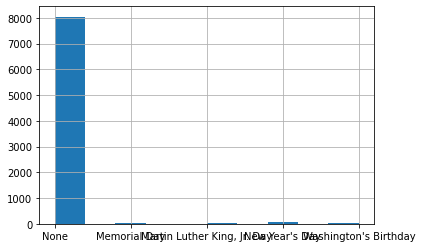